# Programming Assignment I: Quantum Hello World on a Quantum Computer and Simulator with Qiskit

### Objective

This assignment aims to have a first experience in programming a real quantum computer (the IBM Q) and use a simulator mimicking a quantum computer.

### Background

To complete this assignment, you can follow the instructions at Tutorial - Colab and Qiskit. For the assignment, you can use your local Python installation (on your workstation or laptop) or use Google's Colab, as in the tutorial. To access the IBM Q and a quantum computer simulator, you need to install the IBM Qiskit framework.

As you know from the lecture and material on Canvas, programming a quantum computer consists of

1. Creating a circuit (comprising quantum gates that act on qubits)

2. Executing the circuit on the quantum computer (or on the simulator)

3. Measure one or several times the result of the circuit execution. We often plot the results of the measurement as a histogram.

In this assignment, we will run the quantum circuit corresponding to the Hello World code in quantum computing: the Bell circuit. This circuit takes as input two qubits (two qubits can represent four states 00, 01, 10, and 11) and showcases the quantum computing superposition and entanglement. We will describe in detail the circuit in the second module, and you do not need to understand it. You can follow the instructions at Tutorial - Colab and Qiskit for the assignment.

### Tasks:

1. Install Qiskit either on your local machine or on Colab

2. Create an account on the IBM Quantum experience

3. Using Qiskit, create a two-qubit system to implement the Bell's circuit. For this, follow the instructions in the tutorial.
    * Plot the circuit diagram

4. Run the quantum circuit using the Qiskit Aer quantum simulator backend.
    * Plot the histogram with the (simulated) measurements

5. Check which IBM quantum computers are available via the cloud (see the code in the tutorial).
   * Which quantum technology IBM Quantum computers are based on? Find information about the IBM quantum computers and report the information you could find.

6. Run the quantum circuit on any IBM quantum machine you can easily run on. Report the name of the IBM quantum computer you used for your experiments.
   * Plot the histogram with the measurements
   * Compare the results with the simulated ones.

In [18]:
from qiskit import *
from my_quantum_circuit import MyQuantumCircuit

In [ ]:
IBMQ_API_TOKEN: str = 'PASTE_YOUR_IBMQ_API_TOKEN_HERE'
IBMQ.save_account(IBMQ_API_TOKEN)
PROVIDER = IBMQ.load_account()

In [46]:
class BellPairQuantumCircuit(MyQuantumCircuit):

    def bell_pair(
            self,
            qreg_index: int,
            control_qubit_index: int,
            target_qubit_index: int,
    ):
        qreg = self.circuit.qregs[qreg_index]
        control_qubit = qreg[control_qubit_index]
        target_qubit = qreg[target_qubit_index]
        self.circuit.h(control_qubit)
        self.save_statevector(statevector_label='post_bell_pair')\

        self.circuit.cx(control_qubit, target_qubit)
        return self

In [50]:
my_bell_pair_circuit, plotted_results = BellPairQuantumCircuit()\
    .create_simple_circuit(n_qubits=2, name='Bell Pair circuit')\
    .bell_pair(qreg_index=0, control_qubit_index=0, target_qubit_index=1)\
    .measure_qreg_to_creg(qreg_index=0, creg_index=0)\
    .execute_circuit()\
    .plot_results()

3. Using Qiskit, create a two-qubit system to implement the Bell's circuit. For this, follow the instructions in the tutorial.
    * Plot the circuit diagram

Statevector "post_bell_pair": 


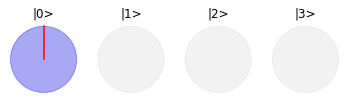

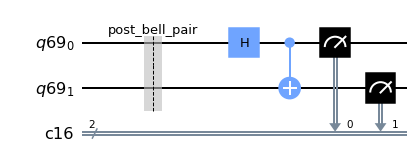

In [51]:
my_bell_pair_circuit\
    .plot_statevector(statevector_label='post_bell_pair')\
    .draw_circuit_nice()[1]

4. Run the quantum circuit using the Qiskit Aer quantum simulator backend.
    * Plot the histogram with the (simulated) measurements

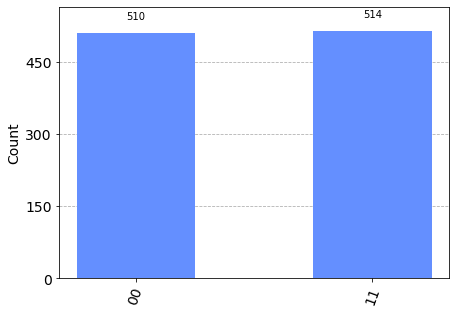

In [49]:
plotted_results

5. Check which IBM quantum computers are available via the cloud (see the code in the tutorial).
   * Which quantum technology IBM Quantum computers are based on? Find information about the IBM quantum computers and report the information you could find.

In [45]:
available_cloud_backends = PROVIDER.backends()

print('Available Cloud Backends:')
for i in available_cloud_backends: print(f'\t- {i}')

Available Cloud Backends:
	- ibmq_qasm_simulator
	- simulator_statevector
	- simulator_mps
	- simulator_extended_stabilizer
	- simulator_stabilizer
	- ibm_lagos
	- ibm_nairobi
	- ibm_perth
	- ibm_brisbane


6. Run the quantum circuit on any IBM quantum machine you can easily run on. Report the name of the IBM quantum computer you used for your experiments.
   * Plot the histogram with the measurements
   * Compare the results with the simulated ones.

In [ ]:
my_bell_pair_circuit, bell_pair_job_monitor = BellPairQuantumCircuit()\
    .create_simple_circuit(n_qubits=2, name='Bell Pair circuit')\
    .bell_pair(qreg_index=0, control_qubit_index=0, target_qubit_index=1)\
    .save_statevector(statevector_label='bell_pair')\
    .measure_qreg_to_creg(qreg_index=0, creg_index=0)\
    .draw_circuit()\
    .exec_circ_on_ibm_qc(provider=PROVIDER)\
    .get_job_monitor()

my_bell_pair_circuit.plot_results()[1]